In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 2 - 1, axis=0)  # X in range [-1, 1]
y = np.sinc(3 * X).ravel() + np.random.randn(100) * 0.1  # Noisy sinc function

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


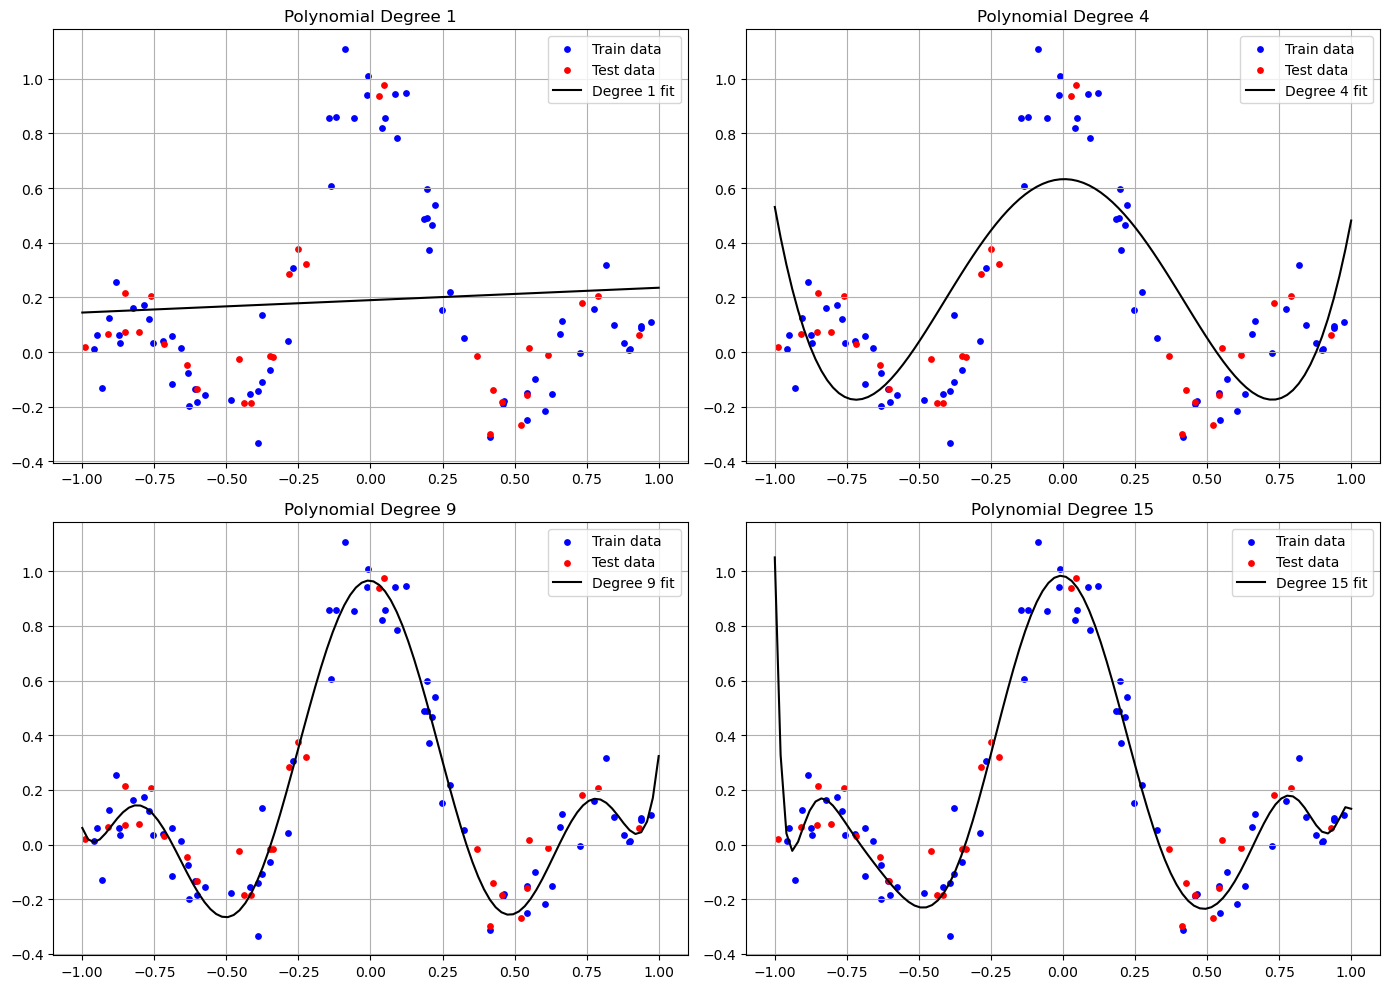

In [9]:
degrees = [1, 4, 9, 15]
x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)

plt.figure(figsize=(14, 10))

for i, degree in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(x_plot)

    plt.subplot(2, 2, i)
    plt.scatter(X_train, y_train, color='blue', label='Train data', s=15)
    plt.scatter(X_test, y_test, color='red', label='Test data', s=15)
    plt.plot(x_plot, y_plot, color='black', label=f'Degree {degree} fit')
    plt.title(f'Polynomial Degree {degree}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


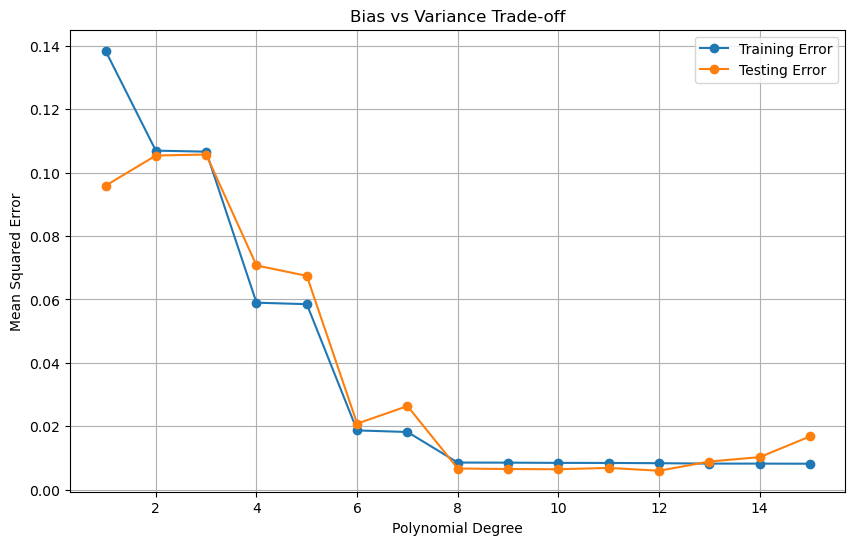

In [11]:
train_errors = []
test_errors = []
degrees = range(1, 16)

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, marker='o', label='Training Error')
plt.plot(degrees, test_errors, marker='o', label='Testing Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias vs Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()
